<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

### Import libraries

This notebook was run and tested on Keras version 2.3.1 and Tensorflow 2.2.0.

In [1]:
# Check keras and tensorflow versions

import tensorflow as tf
import keras as ks

print("Keras version: ", ks.__version__)
print("Tensorflow version: ", tf.__version__)


Keras version:  2.15.0
Tensorflow version:  2.15.0


In [5]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data

In [6]:
# The diabetes dataset
diabetes = load_diabetes()

In [7]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [8]:
# input
X = diabetes.data

# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

# output
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [9]:
# How many observations are in y?
len(y)

442

In [10]:
y.shape

(442,)

### Split the data (training/test)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [12]:
# Set up the model architecture
model = Sequential()

In [13]:
# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 5)                 80        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Compile the model

In [16]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [17]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [18]:
%%time
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 1)

Epoch 1/1000


24/24 [==============================] - 1s 11ms/step - loss: 28743.3047 - mse: 28743.3027 - val_loss: 28092.7793 - val_mse: 28092.7793
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 28715.5859 - mse: 28715.5859 - val_loss: 28058.5957 - val_mse: 28058.5957
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 28676.6875 - mse: 28676.6875 - val_loss: 28014.6191 - val_mse: 28014.6191
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 28626.2910 - mse: 28626.2910 - val_loss: 27955.7559 - val_mse: 27955.7559
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 28557.3711 - mse: 28557.3711 - val_loss: 27876.5254 - val_mse: 27876.5254
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 28462.3574 - mse: 28462.3574 - val_loss: 27760.2012 - val_mse: 27760.2012
Epoch 7/1000
24/24 [==============================] - 0s 4ms/step - loss: 28321.4688 - mse: 28321.4648 - val_

### Create predictions

In [19]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [20]:
predictions

array([[176.4228  ],
       [189.93324 ],
       [172.6671  ],
       [230.47874 ],
       [193.4121  ],
       [264.77396 ],
       [152.99992 ],
       [ 66.23387 ],
       [149.60129 ],
       [169.54991 ],
       [215.1852  ],
       [194.4764  ],
       [ 92.12628 ],
       [227.15736 ],
       [ 88.784615],
       [224.54082 ],
       [ 84.16491 ],
       [122.31077 ],
       [133.93712 ],
       [157.95522 ],
       [ 80.05389 ],
       [ 77.823494],
       [194.81136 ],
       [119.76777 ],
       [234.21977 ],
       [187.75237 ],
       [122.67605 ],
       [ 93.719536],
       [183.70786 ],
       [228.26595 ],
       [224.61613 ],
       [225.3384  ],
       [165.77783 ],
       [116.6006  ],
       [127.17336 ],
       [158.06337 ],
       [105.55715 ],
       [233.43614 ],
       [208.82533 ],
       [126.21353 ],
       [ 95.468605],
       [122.192894],
       [183.81438 ],
       [230.384   ],
       [138.54747 ],
       [270.7528  ],
       [151.58858 ],
       [202.1

### Evaluate the model

In [21]:
# Calculate test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 18ms/step - loss: 3295.5598 - mse: 3295.5598

Test loss: 3295.559814


In [22]:
score

[3295.559814453125, 3295.559814453125]

In [23]:
# Find RMSE
score[0] ** (1/2)

57.40696660208694

In [24]:
y.mean()

152.13348416289594

In [25]:
y.std()

77.00574586945044

In [26]:
y.min()

25.0

In [27]:
y.max()

346.0

### Visualisation of cost

In [28]:
history.history

{'loss': [28743.3046875,
  28715.5859375,
  28676.6875,
  28626.291015625,
  28557.37109375,
  28462.357421875,
  28321.46875,
  28132.44140625,
  27880.54296875,
  27564.841796875,
  27168.81640625,
  26695.00390625,
  26140.294921875,
  25502.517578125,
  24785.388671875,
  24002.263671875,
  23147.49609375,
  22267.10546875,
  21307.3984375,
  20311.5,
  19255.439453125,
  18219.181640625,
  17106.599609375,
  15970.759765625,
  14883.029296875,
  13849.6865234375,
  12841.7939453125,
  11880.5234375,
  10937.2705078125,
  10049.0517578125,
  9204.685546875,
  8476.44921875,
  7829.90380859375,
  7259.99365234375,
  6767.89697265625,
  6348.9560546875,
  5973.39453125,
  5675.01416015625,
  5394.443359375,
  5169.6064453125,
  4988.3037109375,
  4833.4638671875,
  4704.26416015625,
  4606.26708984375,
  4536.822265625,
  4466.8642578125,
  4410.6689453125,
  4370.33056640625,
  4335.05126953125,
  4298.75927734375,
  4267.09033203125,
  4239.2666015625,
  4209.03076171875,
  4184.01

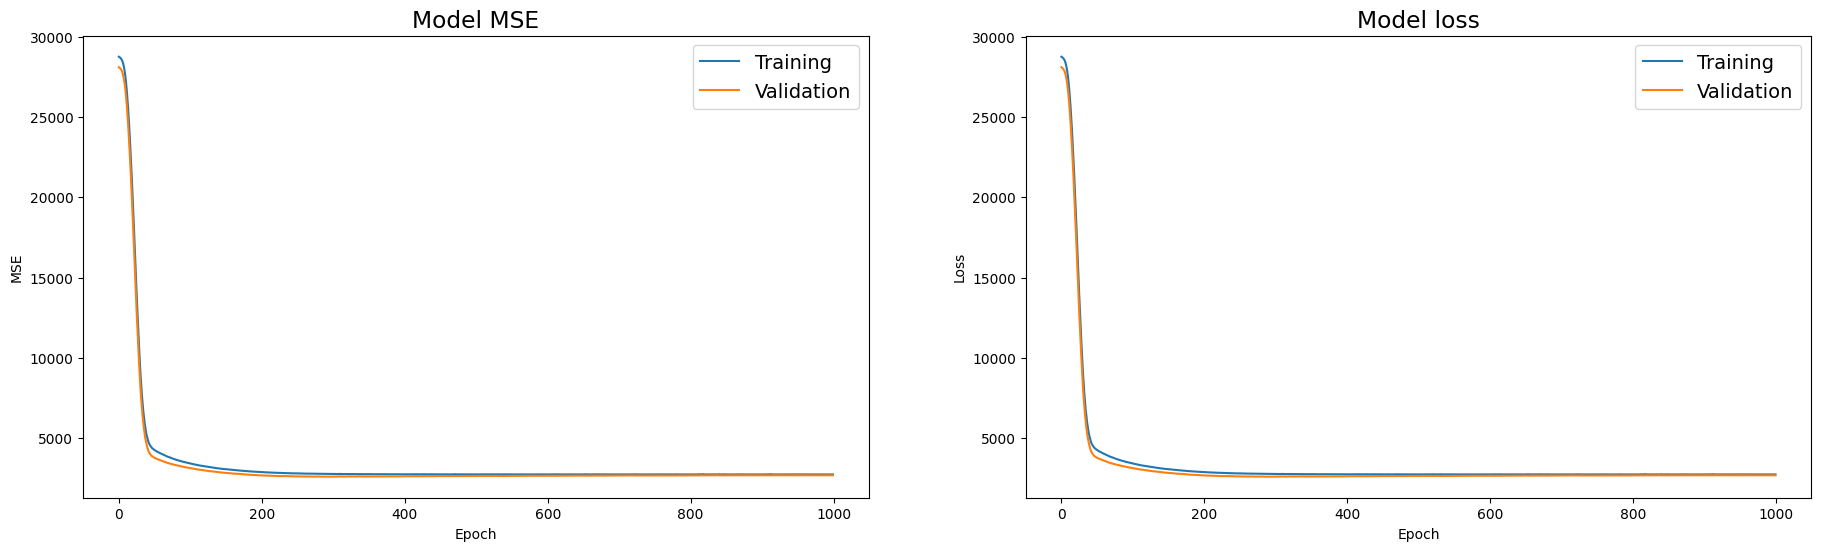

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [30]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

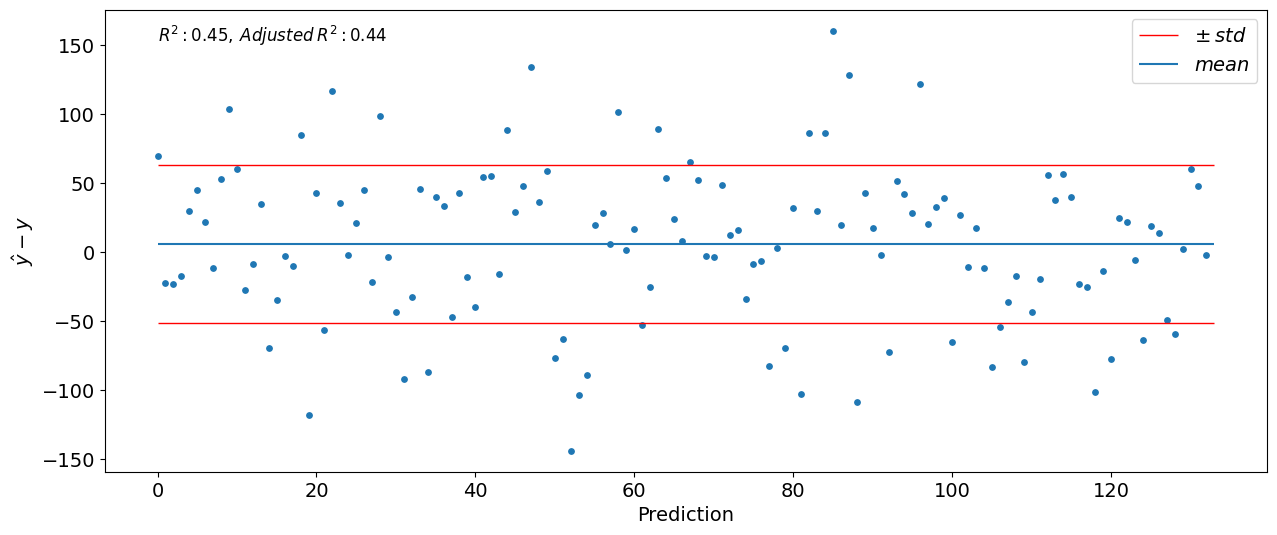

In [31]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



